In [1]:
import os
import sys
import re
import requests
from bs4 import BeautifulSoup
import pickle
sys.path.append('../')
import confana
#from common import *

CoRL2021 ...
https://openreview.net/group?id=robot-learning.org/CoRL/2021/Conference
oral: 26, spotlight: 0, poster: 127, total: 153
	2 Japanese authors out of all 758 authors
	2 Japanese related papers out of all 153 papers
CoRL2022 ...
https://openreview.net/group?id=robot-learning.org/CoRL/2022/Conference
oral: 34, spotlight: 0, poster: 163, total: 197
	3 Japanese authors out of all 1014 authors
	3 Japanese related papers out of all 197 papers
CoRL2023 ...
https://openreview.net/group?id=robot-learning.org/CoRL/2023/Conference
oral: 33, spotlight: 0, poster: 166, total: 199
	13 Japanese authors out of all 1111 authors
	11 Japanese related papers out of all 199 papers
CoRL2024 ...
https://openreview.net/group?id=robot-learning.org/CoRL/2024/Conference
oral: 282, spotlight: 0, poster: 0, total: 282
	18 Japanese authors out of all 1647 authors
	13 Japanese related papers out of all 282 papers
Masayoshi Tomizuka	7
Noriaki Hirose	3
Ayano Hiranaka	2
Kensuke Nakamura	2
Soshi Iba	2
Haruki N

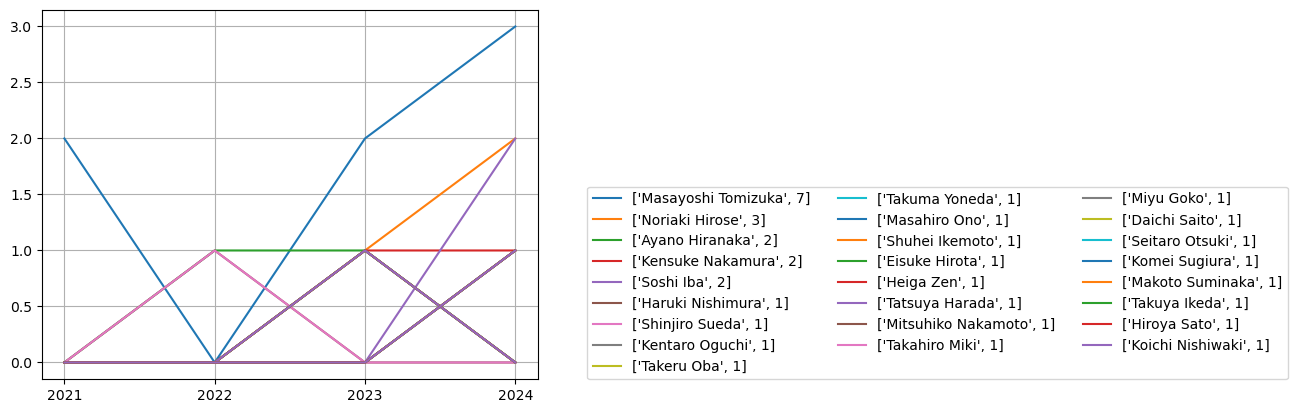

In [8]:
# configurations
urlpost = '/Conference'
since = 2021
until = 2024

#urlpre = 'https://openreview.net/group?id=ICLR.cc/'
#param = confana.set_param(urlpre, 'ICLR', since, until, 1, 1)

#urlpre = 'https://openreview.net/group?id=NeurIPS.cc/'
#param = confana.set_param(urlpre, 'NeurIPS', since, until, 1, 1)

urlpre = 'https://openreview.net/group?id=robot-learning.org/CoRL/'
param = confana.set_param(urlpre, 'CoRL', since, until, 1, 1)

histall = {}

for ii in range(since,until+1,1):
    yr = str(ii)
    url = urlpre+yr+urlpost
    pklfl = param.cachedir + '/' + 'summary' + yr
    conf = param.conf_prefix + yr
    print(conf,'...')
    print(url)

    if os.path.exists(pklfl):
        with open(pklfl,'rb') as f:
            authorss, titles, numoral, numsl, numposter = pickle.load(f)
            #print(f'loading {pklfl}...')
    else:
        pu = confana.parseUrl(param,yr)
        normal, authorss, titles, numoral, numsl, numposter = pu.parseOpenReview(url)
        if normal < 0: 
            print('parsing failed...')

    print(r'oral: {}, spotlight: {}, poster: {}, total: {}'.format(numoral, numsl, numposter,len(titles)))
    pAT = confana.parseATlist(titles, authorss)
    jpauthors, jptitles, numallauthors, numjpauthors, numpapers, numjppaper = pAT.selectJP()
    hist = pAT.makehist(jpauthors,yr)

    with open(pklfl, 'wb') as f:
        pickle.dump((authorss, titles, numoral, numsl, numposter), f)

    print(f'\t{numjpauthors} Japanese authors out of all {numallauthors} authors')
    print(f'\t{numjppaper} Japanese related papers out of all {numpapers} papers')
        
    #print(jpauthors)
    #for ii in range(0,len(jpauthors)):
    #    print(f'{jpauthors[ii]}\t{jptitles[ii]}')
    pAT = confana.parseATlist(titles, authorss)
    histall = pAT.mergehist(histall,hist,yr)

ph = confana.parseHist(param,histall)
ph.plotsorted()

In [ ]:
import pickle
import re

for ii in range(since,until+1,1):
    print("----")
    yr = str(ii)
    print(yr)
    with open(param.cachedir + '/' +   'summary' + yr , 'rb' ) as f:
        authorss, titles, numoral, numsl, numposter = pickle.load(f)

    numpaper = len(titles)
    pt = confana.parseTitle(titles)
    stwordhist = pt.wordfreq()
    for item in stwordhist:
        ratio = item[1]/numpaper
        if ratio > 0.005:
            #print("{0:}\t{1:}\t{2:.5f}".format(item[0],item[1],ratio))
            print("{0:}\t{1:.5f}".format(item[0],ratio))
            #print("{0:}: {1:}".format(item[0],item[1]))
